# Load entire data set from test

In [1]:
import pandas as pd
import pyMAP as pm
%matplotlib notebook

Define function to load all data of the desired type from repo

In [78]:
def all_data(csv_repo,dat_load = ['ILO_IFB','ILO_TOF_BD','ILO_RAW_CNT','TOF_DE_sample']):
    # Separately load each data file
    stuff = pd.concat([pm.data.load(csv_repo,
                dtype = dt) for dt in dat_load],
                      axis =1,sort = True)
    stuff.dropna(subset = dat_load,inplace = True)
    return(stuff)
def combiner(base,other_in, usecol = 'index'):
    def rng_norm(arr):
        return((arr-min(arr))/(max(arr)-min(arr)))
    
    if type(other_in) != list:
        other_IT = [other_in]
    else: 
        other_IT = other_in
        
    dat_parts = [base.reset_index()]
    for other in other_IT: 
        if usecol is 'index':
            base_id = base.index
            other_id = other.index
        elif usecol is 'index_norm':
            base_id = rng_norm(base.index)
            other_id = rng_norm(other.index)
        else: 
            base_id = base[usecol]
            other_id = other[usecol]
        dat_parts.append(other.iloc[np.digitize(base_id,other_id)-1].reset_index())
    return(pd.concat(dat_parts,axis = 1))

def integrate_dat(stuff,rebase = 'TOF_DE_sample'):
    # Combine desired housekeeping data to direct event data frame
    int_cols = {
            'ILO_IFB':['PAC_VSET', 'PAC_OCP', 'MCP_VSET', 'MCP_OCP',
                        'OSCOPE_CH1', 'OSCOPE_CH0','TEMP1', 'TEMP0', 
                       'V5P0_VM', 'V3P3_VM', 'V12P0_VM', 'V12N0_VM',
                       'LV_CM', 'LV_VM', 'LV_TEMP', 'MCP_CM', 'MCP_VM', 
                       'MCP_TEMP', 'PAC_CM','PAC_VM', 'PAC_TEMP', 
                       'V5P0ANA_VM', 'V2P5_VM', 'PAC_VSET_MON', 'PAC_OCP_MON', 
                       'MCP_VSET_MON', 'MCP_OCP_MON'],
            'ILO_TOF_BD':['TOF_P5_VM', 'TOF_P6_VM', 'AN_A_THR_REG', 'AN_B0_THR_REG',
                           'AN_B3_THR_REG', 'AN_C_THR_REG','AN_TOF3_THR_REG', 'AN_TOF2_THR_REG',
                           'AN_TOF1_THR_REG', 'AN_TOF0_THR_REG']
           }
                
    stuff['dat'] = stuff.apply(lambda x: combiner(x[rebase],[x[l][col] for l,col in int_cols.items()],'index_norm'),axis =1)
    return(stuff)

In [77]:
df = all_data('../Test Data/csv/')

Loading ../Test Data/csv/Aliveness_120122_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_FunctionalTest_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_2_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_3_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_5_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_power_on_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_OCP_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_PAC_Func_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_PaC_Ramp_to_16kV_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_Power ON 2_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_power_on_sequence_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_startup_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_TOF_functional_test_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_TOF_functional_test_2_2022

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\pyMAP\pyMAP\data\load.py:14: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  


Loading ../Test Data/csv/EMV1_FunctionalTest_20221205_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_3_20221202_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_5_20221202_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_functional_test_power_on_20221202_TOF_DE_sample.csv
Loading ../Test Data/csv/EMV1_OCP_20221205_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_PAC_Func_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_PaC_Ramp_to_16kV_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_Power ON 2_20221201_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_startup_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_TOF_functional_test_2_20221201_TOF_DE_sample.csv


C:\Users\Jonny Woof\Google Drive\Python_packages_woof\pyMAP\pyMAP\data\load.py:14: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  


Loading ../Test Data/csv/EMv1_UNHSPLAT_ToFCal_20221205_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_TofFunctional_TofH2Spectra_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_TofFunctional_TofH2_10kVSpectra_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_12kV_MCP_Ramp_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_12kV_PaC_background_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_16kV_PaC_Ramp_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_MCP_Gain2_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_MCP_Gain_20221206_TOF_DE_sample.csv
Loading ../Test Data/csv/EMv1_UNHSPLAT_ToF_Functional_threshold_20221206_TOF_DE_sample.csv


In [88]:
df = integrate_dat(df,rebase = 'TOF_DE_sample')

# Plot the results from the anode threshold variation test

select desired run

In [85]:
de_dat=df['dat'].xs('emv1_unhsplat_tof_functional_threshold_20221206_')

splitup data by 'AN_A_THR_REG' and plot 2d spectra

[0.1, 350]
[0.1, 150]


<IPython.core.display.Javascript object>


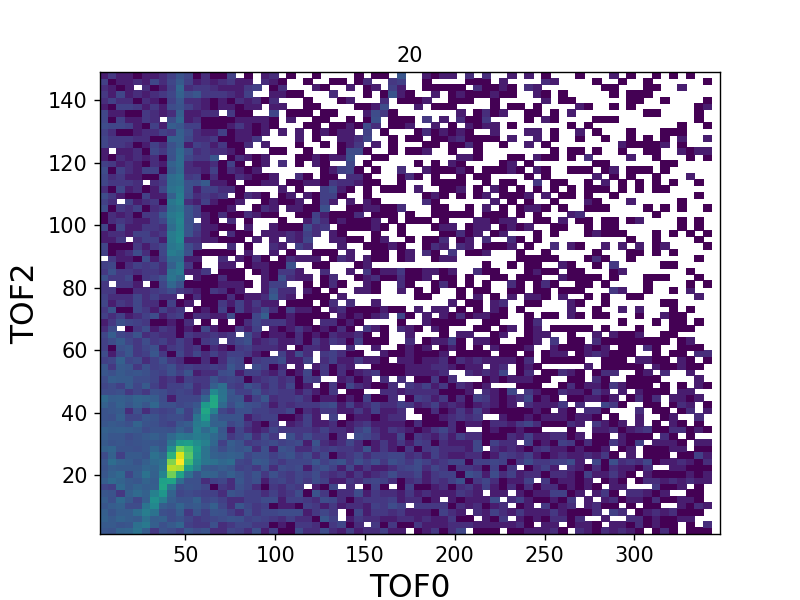

[0.1, 350]
[0.1, 150]


C:\Users\Jonny Woof\Google Drive\Python_packages_woof\pyMAP\pyMAP\plt.py:106: RuntimeWarning: divide by zero encountered in log
  ax.pcolormesh(x,y,(np.log(cnts)if logcol else cnts))
C:\Users\Jonny Woof\Google Drive\Python_packages_woof\pyMAP\pyMAP\plt.py:106: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x,y,(np.log(cnts)if logcol else cnts))


<IPython.core.display.Javascript object>


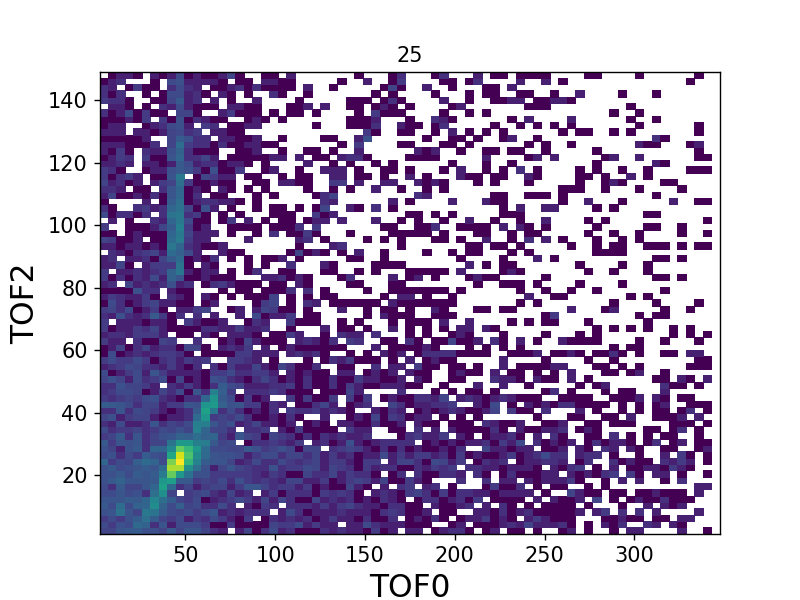

[0.1, 350]
[0.1, 150]


<IPython.core.display.Javascript object>


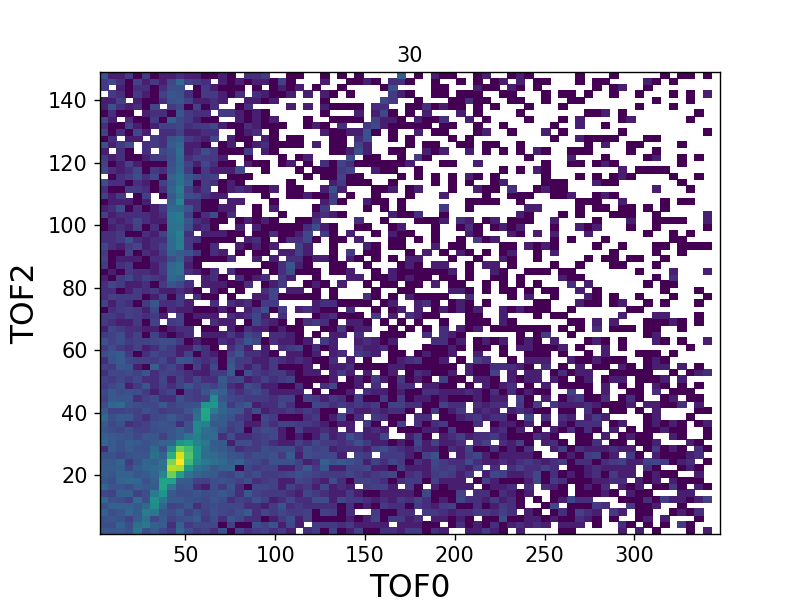

[0.1, 350]
[0.1, 150]


<IPython.core.display.Javascript object>


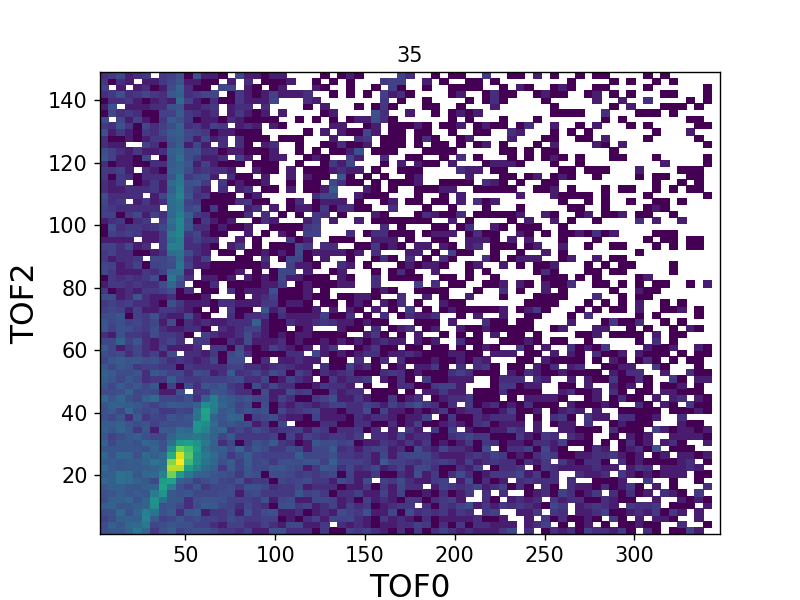

[0.1, 350]
[0.1, 150]


<IPython.core.display.Javascript object>


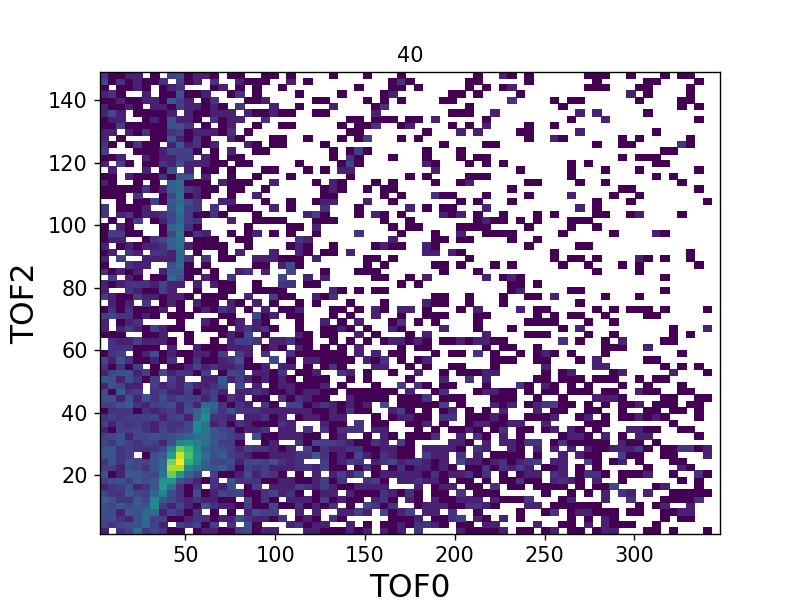

""


In [86]:
def pltr_2d(x):
    fig,ax = pm.plt.plot_tofs_2d(x,'TOF0','TOF2')
    ax.set_title(x.name)
    
de_dat.groupby(['AN_A_THR_REG']).apply(pltr_2d)

Again, group data by 'AN_A_THR_REG' and overplot 1d Spectra

<IPython.core.display.Javascript object>


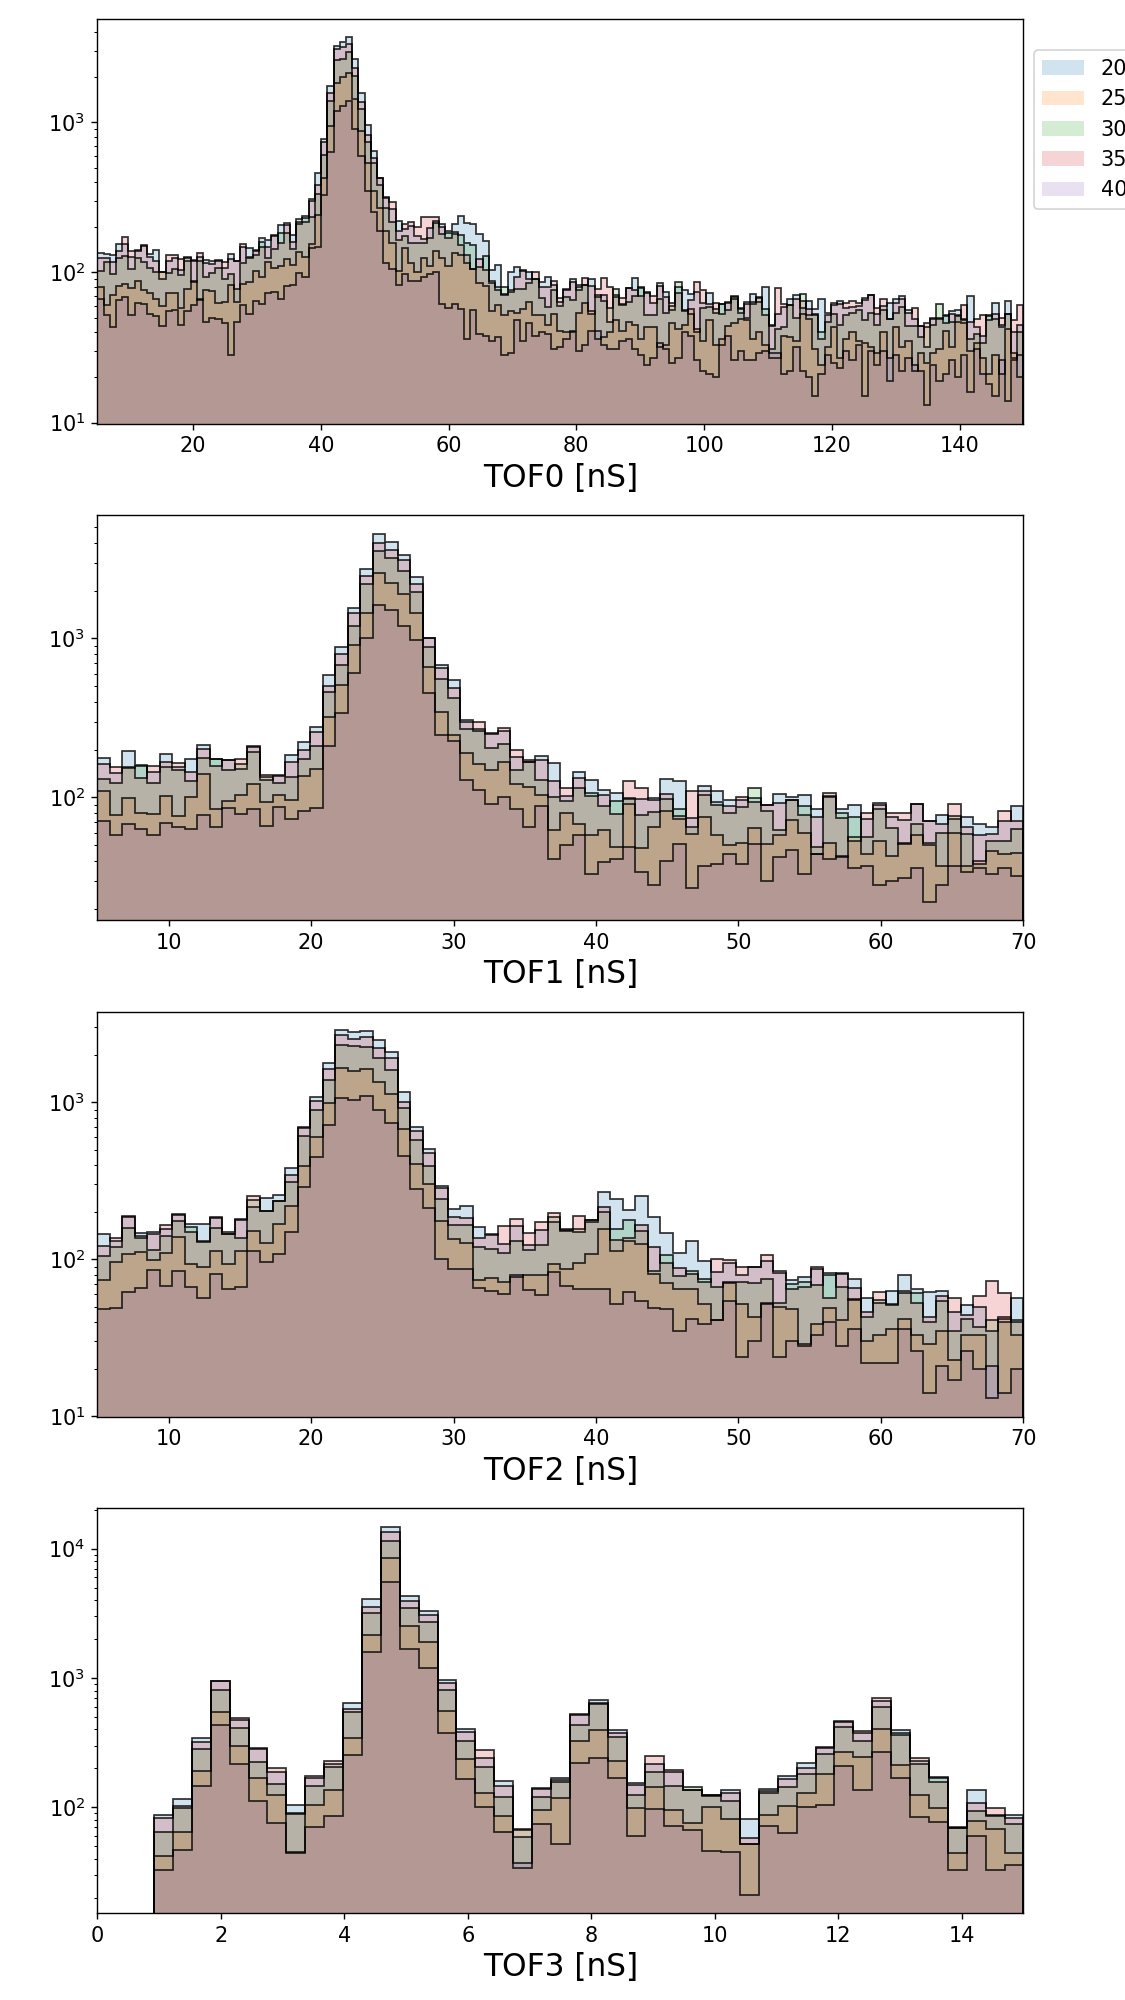

In [87]:
def pltr_1d(x):
    fig,axs = pm.plt.plot_tofs(x)
fig,ax = pm.plt.plot_tofs(de_dat.groupby(['AN_A_THR_REG']),
                              bins = {
                                       'TOF2':np.linspace(5,70,75),
                                       'TOF3':np.linspace(0,15,50),
                                        'TOF0': np.linspace(5,150,150),
                                       'TOF1':np.linspace(5,70,75),  
                                            },
                         )
[a.semilogy() for a in ax]
pm.bowPy.plotJon.legend.legend_loc(fig,ax[0],title = )